In [5]:
from astropy.coordinates import EarthLocation
from astropy.utils import iers
from astropy.coordinates import get_body_barycentric,get_body_barycentric_posvel, get_body, get_moon
from astropy.utils import iers
from astropy.coordinates import get_body_barycentric,get_body_barycentric_posvel, get_body, get_moon
from astropy.coordinates import solar_system_ephemeris
from astropy.coordinates import EarthLocation
from astropy import units
from astropy.coordinates import CartesianRepresentation, CartesianDifferential, SkyCoord, GCRS
from math import acos, cos
from astropy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

import astropy
import astropy.coordinates
from astropy.time import Time
from importlib import reload  
from math import ceil
import doppler
import util
import os

In [14]:
#Setup Environment
from importlib import reload  
reload(doppler)
reload(util)
from doppler import DopplerSystemEME, save, load
from util import get_earth_grid

iers.conf.iers_auto_url = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
solar_system_ephemeris.set('jpl') 


ModuleNotFoundError: No module named 'dill'

In [12]:
#Setup Doppler Instance
start_string = '2020-01-01T00:00:00.00Z'
timestep = units.Quantity('15 min')
timespan = units.Quantity('24 hour')
emitters = [EarthLocation.from_geodetic(lat = "38°25'53.6", lon = "-79.839896°", height=0), 
           EarthLocation.from_geodetic(lat = "58°25'53.6", lon = "-50.839896°", height=0)]

reciever = EarthLocation.from_geodetic(lat = "38°25'53.6", lon ="-79°49'08.9", height=0)

start_time = Time(start_string, format='isot', scale='utc')
doppler_system = DopplerSystemEME(emitters, reciever, start_time, timestep, timespan, only_visible = False, signal=10e6)

In [13]:
#Calculate and save
doppler_system.update()
doppler_system.save('demo2/state.json')
doppler_system.save_plots('demo2/')

TypeError: cannot pickle 'weakref' object

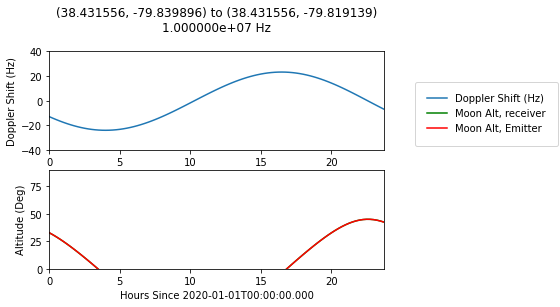

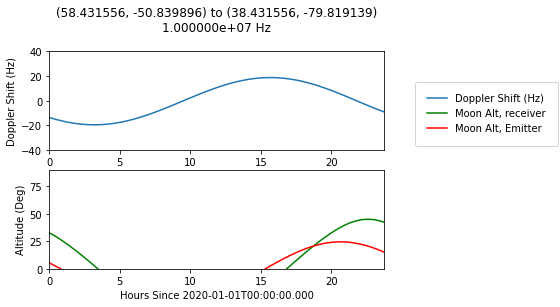

In [8]:
doppler_system.get_plot(0)
doppler_system.get_plot(1)

In [12]:
#Same, but with many emitters around Earth
emitters, grid = get_earth_grid(45)
reciever = EarthLocation.from_geodetic(lat = "38°25'53.6", lon ="-79°49'08.9", height=0) #GBT
start_string = '2020-01-01T00:00:00.00Z'
timestep = units.Quantity('15 min')
timespan = units.Quantity('4 hour')
start_time = Time(start_string, format='isot', scale='utc')
doppler_system2 = DopplerSystemEME(emitters, reciever, start_time, timestep, timespan, only_visible = True)

In [1]:
doppler_system2.update()
doppler_system2.save_plots('demo3/')

NameError: name 'doppler_system2' is not defined

In [ ]:
def is_local_min(signal, dopplers, idx, n):
    
    
    

def get_closest(a, b):
    m = 99999999
    ind = -1
    c = b-a 
    for i in range(0, len(emitters)):
        count = np.count_nonzero(~np.isnan(c))
        if count >2:
            err  = np.nansum(np.abs(c[i]))/count
            if err < m:
                ind = i
                m = err
    return ind